### Project Number: [0002]

# **STAGE 3. PRELIMINARY EXPLORATORY DATA ANALYSIS**

### Import Libraries

---

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn') 

### Import Data

---

In [2]:
data_path = r'D:/Data_Science_Project/7. Test task/[0010] Project 1 - Лаборатория функциональной нейрофизиологии/Task#2'

In [3]:
# Загрузка набора данных bitalino_data
bitalino_data = pd.read_feather(data_path + '/bitalino_data.file')
# проверка результата
bitalino_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037227 entries, 0 to 1037226
Data columns (total 7 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   nseq    1037227 non-null  int64
 1   i1      1037227 non-null  int64
 2   i2      1037227 non-null  int64
 3   o1      1037227 non-null  int64
 4   o2      1037227 non-null  int64
 5   a1      1037227 non-null  int64
 6   a2      1037227 non-null  int64
dtypes: int64(7)
memory usage: 55.4 MB


In [37]:
# Загрузка набора данных: respiration_data
respiration_data = pd.read_csv(data_path + '/respiration_data_prep.csv')

# Преобразование даты 
respiration_data['time'] = pd.to_datetime(respiration_data['time'])
# Переиндексация по переменной время 
respiration_data = respiration_data.set_index('time')

# Проверка результата
respiration_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 325 entries, 2020-12-11 00:00:04 to 2020-12-11 00:17:53
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   vt_(btps)     325 non-null    float64
 1   rr            325 non-null    float64
 2   v'e_(btps)    325 non-null    float64
 3   v'max_(btps)  325 non-null    float64
 4   feeto2        325 non-null    float64
 5   feetco2       325 non-null    float64
 6   peto2         325 non-null    float64
 7   petco2        325 non-null    float64
 8   v'o2_(stpd)   325 non-null    float64
 9   v'co2_(stpd)  325 non-null    float64
 10  rer           325 non-null    float64
 11  v'o2/kg       325 non-null    int64  
 12  mets          325 non-null    float64
 13  v'e/v'o2      325 non-null    float64
 14  v'e/v'co2     325 non-null    float64
 15  vd/vt         325 non-null    float64
 16  hr            325 non-null    object 
 17  q'            325 non-null    float6


## SECTION 3.1 RESEARCH

### _Descriptive Statistics_

---

In [5]:
# Описательные статистики набора bitalino_data
bitalino_data.describe().round(2)

,nseq,i1,i2,o1,o2,a1,a2
count,1037227.00,1037227.0,1037227.0,1037227.0,1037227.00,1037227.00,1037227.00
mean,7.50,1.0,1.0,0.0,1.00,511.29,508.42
std,4.61,0.0,0.0,0.0,0.06,36.20,10.53
min,0.00,1.0,1.0,0.0,0.00,296.00,367.00
25%,3.00,1.0,1.0,0.0,1.00,489.00,507.00
50%,7.00,1.0,1.0,0.0,1.00,510.00,508.00
75%,11.00,1.0,1.0,0.0,1.00,528.00,510.00
max,15.00,1.0,1.0,0.0,1.00,760.00,630.00


In [6]:
# Описательные статистики набора respiration_data
respiration_data.describe().T.round(5)

,count,mean,std,min,25%,50%,75%,max
vt_(btps),325.0,0.94415,0.44384,0.450,0.590,0.670,1.380,2.250
rr,325.0,19.51969,4.69510,12.400,16.300,17.800,21.300,30.700
v'e_(btps),325.0,20.16523,14.47513,7.900,9.800,11.400,28.700,54.000
v'max_(btps),325.0,0.95517,0.76949,0.370,0.430,0.510,1.270,2.980
feeto2,325.0,14.47825,0.80263,12.460,14.090,14.630,14.900,16.410
feetco2,325.0,5.78668,0.50802,4.730,5.410,5.600,6.230,6.950
peto2,325.0,98.88492,5.46718,85.100,96.300,99.900,101.700,112.100
petco2,325.0,39.52215,3.49124,32.300,36.900,38.200,42.600,47.500
v'o2_(stpd),325.0,0.75448,0.61302,0.189,0.293,0.345,1.291,2.226
v'co2_(stpd),325.0,0.67644,0.60923,0.161,0.245,0.295,1.054,2.113


### _Distribution of data_

---

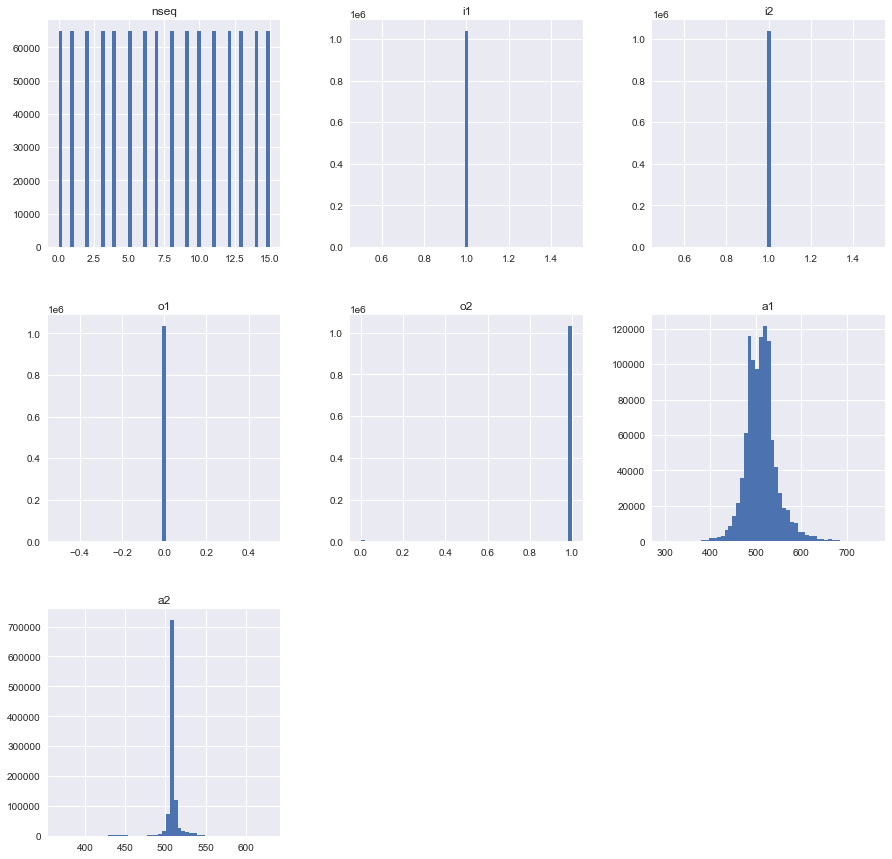

In [7]:
# Распределение данных bitalino_data
bitalino_data.hist(bins=55, figsize=(15,15))
plt.show()

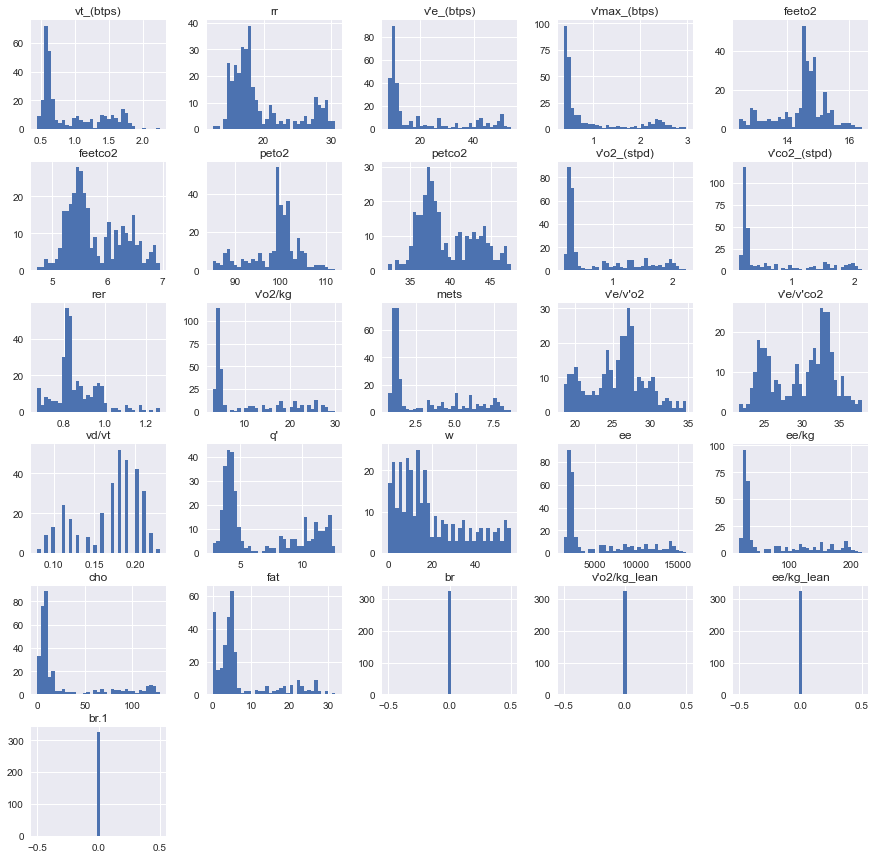

In [8]:
# Распределение данных respiration_data
respiration_data.hist(bins=35, figsize=(15,15))
plt.show()

### _Outliers detection_

---

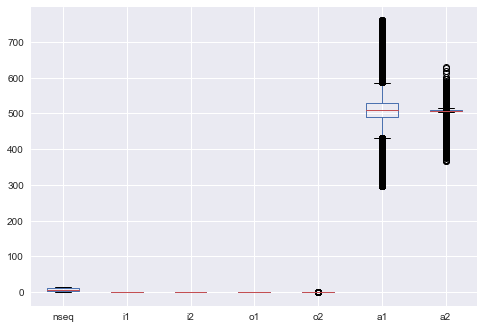

In [9]:
# Распределение данных bitalino_data
bitalino_data.boxplot()
plt.show()

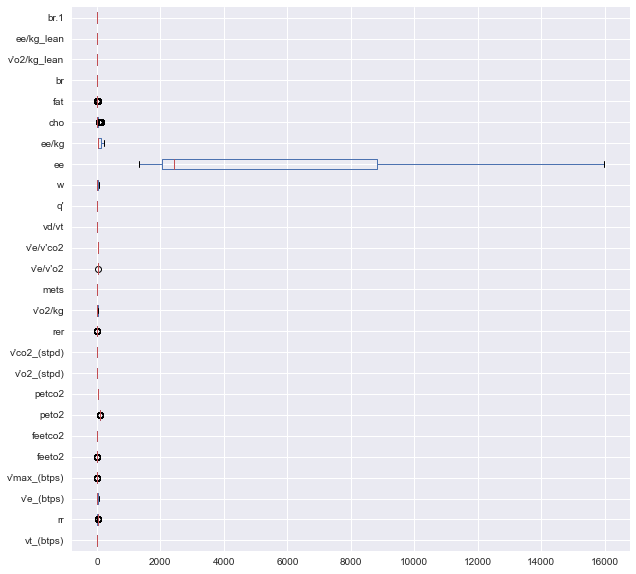

In [10]:
# Распределение данных respiration_data
respiration_data.boxplot(vert=False, figsize=(10,10))
plt.show()

### _Exploring Relationships_

---

In [11]:
# Взаимоотношения между переменными bitalino_data
# sns.pairplot(data = bitalino_data, corner=True)

In [12]:
# Взаимоотношения между переменными respiration_data
# sns.pairplot(data = respiration_data, corner=True)

### _Time Series Analysis_

---

#### Задача 1
- Визуализируйте показатели частоты дыхания, полученные с обоих девайсов. 
- Что нужно сделать для калибровки обоих сигналов по времени?

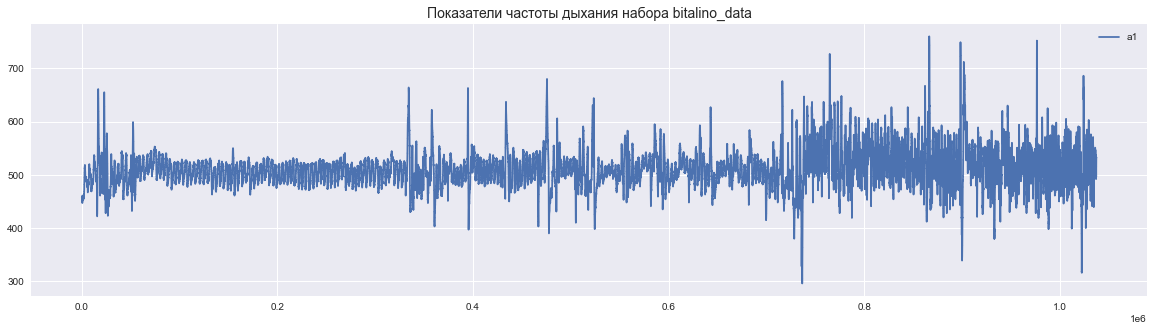

In [13]:
# Визуализируйте показатели частоты дыхания  bitalino_data
fig, ax = plt.subplots()
bitalino_data[['a1']].plot(figsize=(20,5), ax=ax)
ax.set_title('Показатели частоты дыхания набора bitalino_data', fontsize=14)
plt.show()


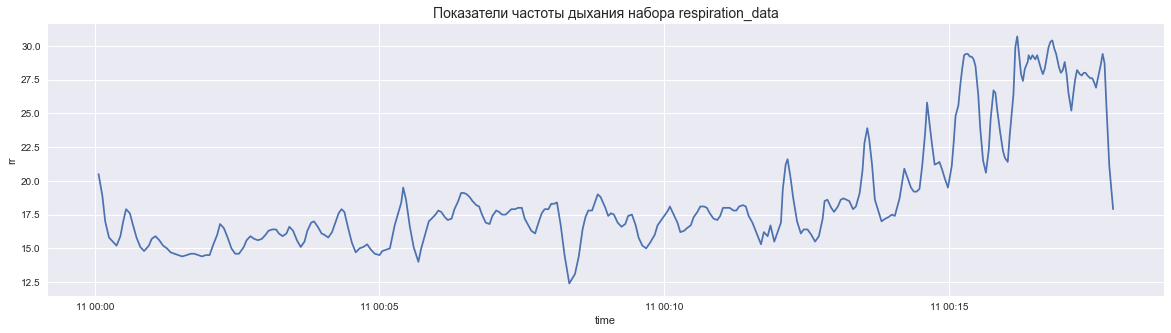

In [14]:
fig, ax = plt.subplots(figsize=(20,5))
sns.lineplot(data = respiration_data, x='time', y='rr', ax=ax)
ax.set_title('Показатели частоты дыхания набора respiration_data', fontsize=14)
plt.show()

**Что нужно сделать дляы калибровки обоих сигналов по времени?**
1. Задать эталонный временой ряд используя интервал наблюедений respiration_data с 2020-12-11 00:00:04 до 2020-12-11 00:17:53
2. Привести оба ряда к эталонному.

**Мои затруднения**
- Не знаю как окончательно провести калибровку сигналов, но уверен, что это реализуется или через эталонный одинаковый временной ряд иди через оценку автокорреляции рядов, но т.к. в наборе bitalino_data нет временных меток, то не возможно посчитать автокорреляцию. 
- Проблематично сделать вывод без выполненой калибровки 

In [48]:
# Переод измерений respiration_data  
periods_r = pd.date_range(start='2020-12-11 00:00:04', end='2020-12-11 00:17:53', freq='S')
periods_r

DatetimeIndex(['2020-12-11 00:00:04', '2020-12-11 00:00:05',
               '2020-12-11 00:00:06', '2020-12-11 00:00:07',
               '2020-12-11 00:00:08', '2020-12-11 00:00:09',
               '2020-12-11 00:00:10', '2020-12-11 00:00:11',
               '2020-12-11 00:00:12', '2020-12-11 00:00:13',
               ...
               '2020-12-11 00:17:44', '2020-12-11 00:17:45',
               '2020-12-11 00:17:46', '2020-12-11 00:17:47',
               '2020-12-11 00:17:48', '2020-12-11 00:17:49',
               '2020-12-11 00:17:50', '2020-12-11 00:17:51',
               '2020-12-11 00:17:52', '2020-12-11 00:17:53'],
              dtype='datetime64[ns]', length=1070, freq='S')

In [52]:
# Переод измерений bitalino_data
periods_b = pd.date_range(start='2019-11-02 00:00:00', end='2019-11-02 12:24:53', freq='S')
periods_b

DatetimeIndex(['2019-11-02 00:00:00', '2019-11-02 00:00:01',
               '2019-11-02 00:00:02', '2019-11-02 00:00:03',
               '2019-11-02 00:00:04', '2019-11-02 00:00:05',
               '2019-11-02 00:00:06', '2019-11-02 00:00:07',
               '2019-11-02 00:00:08', '2019-11-02 00:00:09',
               ...
               '2019-11-02 12:24:44', '2019-11-02 12:24:45',
               '2019-11-02 12:24:46', '2019-11-02 12:24:47',
               '2019-11-02 12:24:48', '2019-11-02 12:24:49',
               '2019-11-02 12:24:50', '2019-11-02 12:24:51',
               '2019-11-02 12:24:52', '2019-11-02 12:24:53'],
              dtype='datetime64[ns]', length=44694, freq='S')

In [22]:
from scipy import signal

In [28]:
corr = signal.correlate(bitalino_data[['a1']], respiration_data[['rr']], mode='same')

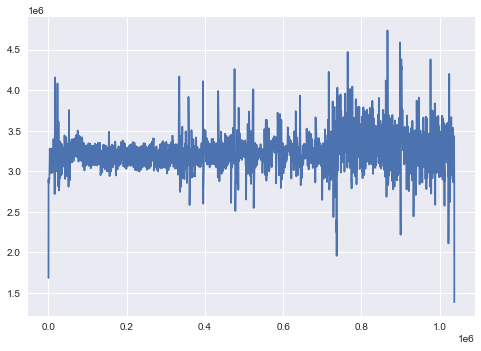

In [29]:
plt.plot(corr)

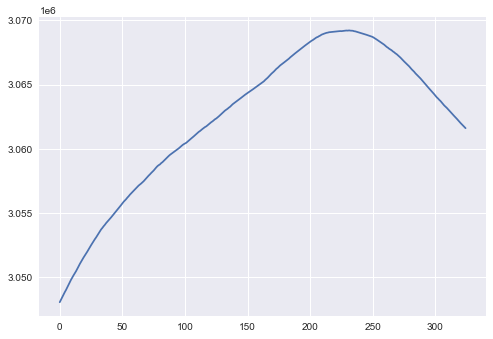

In [53]:
corr = signal.correlate(respiration_data[['rr']],bitalino_data[['a1']], mode='same')
plt.plot(corr)